<a href="https://colab.research.google.com/github/guntsvzz/CP_Project/blob/main/EEG_Stress_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.6 MB 4.4 MB/s 


In [2]:
pip install components

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pickle
import numpy as np
import os
import mne
import pandas as pd
pickle.format_version

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms  
from torch.utils.data import DataLoader, Dataset  
from torch.utils.data import TensorDataset
from torch.autograd import Variable

import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

# setting seed so that splitting process and training process can be reproduce
torch.manual_seed(1)

# Import File

In [4]:
main_path = os.getcwd()
all_file = os.listdir()
file_name = list()
for file in all_file:
    if file[0:3] == 'exp':
        file_name.append(file)
file_name = sorted(file_name)
file = file_name[8:] + file_name[0:8]
print(file)

['exp1_Ati.csv', 'exp2_Tonson.csv', 'exp3_Pyae.csv', 'exp4_Duc.csv', 'exp5_And.csv', 'exp6_Sayaka.csv', 'exp7_Suyoga.csv', 'exp8_Arti.csv', 'exp9_Amanda.csv', 'exp10_Sapna.csv', 'exp11_Data.csv', 'exp12_Jirasak.csv', 'exp13_Max.csv', 'exp14_Ayush.csv', 'exp15_Dipesh.csv', 'exp16_Shashank.csv', 'exp17_Mi.csv']


# Define Channel

In [5]:
df1 = pd.read_csv(main_path + '/' + file[0])
df1 = df1.drop(columns=['Unnamed: 0', '0', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31'])
df1.columns = ['Fp1', 'Fp2', 'F7', 'F3', 'F4', 'F8', 'T3', 'C3', 'C4', 'T4', 'T5', 'P3', 'P4', 'T6', 'O1', 'O2']
df1

,Fp1,Fp2,F7,F3,F4,F8,T3,C3,C4,T4,T5,P3,P4,T6,O1,O2
0,-3203.250850,-7278.934989,-22030.236963,-9343.319755,-3711.417760,2255.693347,-12633.653001,3538.079982,-22537.129824,-5153.306443,-16958.246166,-12598.918390,-25105.434669,-17961.593623,-23601.229322,-12943.850511
1,-3201.261544,-7280.209038,-22023.464384,-9339.251738,-3717.095103,2254.843981,-12623.482957,3549.121743,-22528.434995,-5154.111106,-16954.200501,-12597.577285,-25057.289011,-17954.262251,-23595.775496,-12940.073066
2,-3196.210050,-7273.592922,-22024.492565,-9336.636583,-3709.696676,2258.263798,-12628.355638,3541.052764,-22536.682789,-5150.914806,-16955.631012,-12597.934913,-25113.861276,-17958.620841,-23597.206008,-12945.079857
3,-3200.680399,-7275.045785,-22027.152422,-9340.548139,-3711.887146,2257.839114,-12625.986353,3540.337508,-22531.653646,-5155.362803,-16966.918643,-12605.355693,-25079.171369,-17968.075629,-23611.891104,-12950.332516
4,-3200.434530,-7280.454907,-22023.263219,-9337.888281,-3719.866719,2250.083059,-12625.360504,3544.740801,-22535.162870,-5155.876894,-16955.586309,-12599.141908,-25085.094581,-17956.765647,-23594.814371,-12943.895214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,-1023.687544,-4436.709516,-24608.175410,-7672.683319,-870.712205,3996.514260,-11068.561503,2068.966874,-19891.152667,-2561.196990,-15042.232280,-10727.473882,-23593.182694,-15365.058525,-21944.339209,-10726.311591
44996,-1016.534986,-4433.557920,-24602.051032,-7667.207142,-870.868667,3997.363627,-11064.828761,2070.620903,-19898.282873,-2560.526438,-15037.672524,-10726.758626,-23615.623846,-15353.480322,-21941.701703,-10729.016153
44997,-1015.238585,-4427.813521,-24602.676881,-7664.524932,-859.826906,4002.616287,-11067.220398,2069.458612,-19891.867923,-2558.313615,-15045.048600,-10730.424312,-23618.797793,-15361.482246,-21954.531605,-10730.089036
44998,-1018.189015,-4432.820312,-24600.844038,-7668.280026,-871.963903,4003.420949,-11061.364241,2073.280760,-19889.163362,-2559.073574,-15034.945611,-10725.953964,-23582.744429,-15350.127560,-21938.706570,-10721.908298


In [6]:
# Drop some columns and save it into the new file.
for i in range(len(file)):
    converted_signal_path = main_path + '/Converted_signal/' + 'Conv_' + file[i]
    df = pd.read_csv(main_path + '/' + file[i])
    df = df.drop(columns=['Unnamed: 0', '0', '17', '18', '19', '20', '21', '22',
        '23', '24', '25', '26', '27', '28', '29', '30', '31'])
    df.columns = ['Fp1', 'Fp2', 'F7', 'F3', 'F4', 'F8', 'T3', 'C3', 'C4', 'T4', 'T5', 'P3', 'P4', 'T6', 'O1', 'O2']
    df = df.set_index(df.columns[0])
    df.to_csv(converted_signal_path)

In [7]:
def df_to_raw(df):
    ch_names = ['Fp1', 'Fp2', 'F7', 'F3', 'F4', 'F8', 'T3', 'C3', 'C4', 'T4', 'T5', 'P3', 'P4', 'T6', 'O1', 'O2']
    ch_types = ['eeg'] * len(ch_names)
    df = df.T
    sampling_rate = 250 #Hz
    info = mne.create_info(ch_names=ch_names, ch_types=ch_types, sfreq=sampling_rate)
    raw = mne.io.RawArray(df, info)
    raw.set_montage('standard_1020')
    return raw

In [8]:
from mne import Epochs, find_events

def getEpochs(raw, event_id, tmin, tmax, picks):

    #epoching
    events = find_events(raw)
    epochs = Epochs(raw, events=events, event_id=event_id, 
                    tmin=tmin, tmax=tmax, baseline=None, preload=True,verbose=False, picks=picks)  #8 channels
    print('sample drop %: ', (1 - len(epochs.events)/len(events)) * 100)

    return epochs

In [9]:
# Get the name of converted data
main_path = os.getcwd()
all_file = os.listdir(main_path + '/Converted_signal')
conv_list = all_file[8:] + all_file[0:8]
conv_list

['Conv_exp9_Amanda.csv',
 'Conv_exp7_Suyoga.csv',
 'Conv_exp5_And.csv',
 'Conv_exp16_Shashank.csv',
 'Conv_exp13_Max.csv',
 'Conv_exp1_Ati.csv',
 'Conv_exp14_Ayush.csv',
 'Conv_exp2_Tonson.csv',
 'Conv_exp3_Pyae.csv',
 'Conv_exp10_Sapna.csv',
 'Conv_exp17_Mi.csv',
 'Conv_exp8_Arti.csv',
 'Conv_exp6_Sayaka.csv',
 'Conv_exp12_Jirasak.csv',
 'Conv_exp11_Data.csv',
 'Conv_exp4_Duc.csv',
 'Conv_exp15_Dipesh.csv']

In [10]:
file_path = main_path + '/Converted_signal/'
all_data = []
for file in conv_list:
    path = file_path + file
    df = pd.read_csv(path)
    all_data.append(df)

In [11]:
X = np.array(all_data)
X = np.transpose(X, (0, 2, 1))

# Import PSS10 data

In [12]:
df = pd.read_csv('PSS10 - Sheet1.csv')
y = np.array(df['label'])
y

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1])

# Split Data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=999)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(13, 16, 45000) (4, 16, 45000) (13,) (4,)


In [15]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=999)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(11, 16, 45000) (2, 16, 45000) (11,) (2,)


In [16]:
from sklearn.preprocessing import MinMaxScaler

#scale transform each channel independently
scalers = {}
for i in range(X_train.shape[2]):
    scalers[i] = MinMaxScaler(feature_range=(-1, 1))
    X_train[:, :, i] = scalers[i].fit_transform(X_train[:, :, i]) 

for i in range(X_val.shape[2]):
    X_val[:, :, i]   = scalers[i].transform(X_val[:, :, i])     
    
for i in range(X_test.shape[2]):
    X_test[:, :, i]  = scalers[i].transform(X_test[:, :, i]) 

In [17]:
print(X_train.mean(), X_val.mean(), X_test.mean())
print(X_train.min(), X_val.min(), X_test.min())
print(X_train.max(), X_val.max(), X_test.max())

0.1273476113363838 -0.1530318051502836 -0.008639289287877806
-1.0 -5.70215726188583 -5.804701026562504
1.0000000000000004 6.412578848667387 1.633039504659759


# Tensor

In [18]:
X_train_tensor = torch.tensor(X_train).to(torch.float32)
y_train_tensor = torch.tensor(y_train).to(torch.float32)
X_val_tensor = torch.tensor(X_val).to(torch.float32)
y_val_tensor = torch.tensor(y_val).to(torch.float32)
X_test_tensor = torch.tensor(X_test).to(torch.float32)
y_test_tensor = torch.tensor(y_test).to(torch.float32)

# Cast data to dataloader for more convenience
training_set = TensorDataset(X_train_tensor, y_train_tensor)
testing_set = TensorDataset(X_test_tensor, y_test_tensor)
validation_set = TensorDataset(X_val_tensor, y_val_tensor)

train_batch_size = 5
val_batch_size = len(validation_set)
test_batch_size = len(testing_set)

train_loader = DataLoader(training_set, train_batch_size, shuffle=True)
val_loader = DataLoader(validation_set, val_batch_size, shuffle=True)
test_loader = DataLoader(testing_set, test_batch_size, shuffle=True)

In [20]:
for data, label in train_loader:
  print(data)
  break

tensor([[[ 2.9449e-01,  2.9322e-01,  2.9747e-01,  ...,  1.0000e+00,
           1.0000e+00,  1.0000e+00],
         [ 3.0708e-01,  3.0608e-01,  3.0970e-01,  ...,  5.2585e-01,
           5.5209e-01,  5.1636e-01],
         [ 6.7623e-01,  6.7259e-01,  6.7672e-01,  ...,  1.0000e+00,
           1.0000e+00,  1.0000e+00],
         ...,
         [ 1.0000e+00,  1.0000e+00,  1.0000e+00,  ...,  1.0000e+00,
           1.0000e+00,  1.0000e+00],
         [ 8.0891e-01,  8.2519e-01,  8.1632e-01,  ...,  9.8336e-01,
           9.7279e-01,  9.7556e-01],
         [ 1.1666e-01,  1.1489e-01,  1.1578e-01,  ...,  1.1091e-01,
           1.0793e-01,  1.0934e-01]],

        [[ 1.0000e+00,  1.0000e+00,  1.0000e+00,  ...,  5.2233e-01,
           5.2358e-01,  5.2387e-01],
         [ 1.0000e+00,  1.0000e+00,  1.0000e+00,  ...,  6.5781e-01,
           6.8749e-01,  6.4978e-01],
         [ 1.0000e+00,  1.0000e+00,  1.0000e+00,  ...,  7.5530e-01,
           7.5613e-01,  7.5630e-01],
         ...,
         [ 1.1717e-01,  1

In [21]:
data.shape

torch.Size([5, 16, 45000])

In [22]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [23]:
lstm_model = nn.LSTM(input_size=45000, hidden_size=500)

# LSTM model

In [24]:
class LSTM(nn.Module):
    '''
    Expected Input Shape: (batch, channels, seq_len, )
    '''
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim, bidirectional, dropout):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, 
                           hidden_dim, 
                           num_layers=num_layers, 
                           bidirectional=bidirectional, 
                           dropout=dropout,
                           batch_first=True)
        self.fc = nn.Linear(hidden_dim * num_layers, output_dim)
        
    def forward(self, x):
        
        #x = [batch size, channels, seq len, ]
        out, (hn, cn) = self.lstm(x)
        
        #out = [batch size, seq len, hidden dim * num directions]        
        #hn = [num layers * num directions, batch size, hidden dim]
        #cn = [num layers * num directions, batch size, hidden dim]
        
        #concat the final forward (hidden[-2,:,:]) and backward (hidden[-1,:,:]) hidden layers
        hn = torch.cat((hn[-2,:,:], hn[-1,:,:]), dim = 1)
        #hn = [batch size, hidden dim * num directions]
        
        return self.fc(hn)

In [25]:
#explicitly initialize weights for better learning
def initialize_weights(m):
    if isinstance(m, nn.Linear):   #if layer is of Linear
        nn.init.xavier_normal_(m.weight)
        nn.init.zeros_(m.bias)
    elif isinstance(m, nn.LSTM):   #if layer is of LSTM
        for name, param in m.named_parameters():
            if 'bias' in name:
                nn.init.zeros_(param)
            elif 'weight' in name:
                nn.init.orthogonal_(param)  #orthogonal is a common way to initialize weights for RNN/LSTM/GRU

In [26]:
input_dim     = 45000 
hidden_dim    = 256 
num_layers    = 2  
output_dim    = 1  #we got 2 classes so we can output only 1 number, 0 for first class and 1 for another class
bidirectional = True  #uses bidirectional LSTM
dropout       = 0.7 

#define the model
model = LSTM(input_dim, hidden_dim, num_layers, output_dim, bidirectional, dropout)

#send to cuda so we can use the GPU
model = model.to(device)  

#apply weights
model.apply(initialize_weights)


LSTM(
  (lstm): LSTM(45000, 256, num_layers=2, batch_first=True, dropout=0.7, bidirectional=True)
  (fc): Linear(in_features=512, out_features=1, bias=True)
)

In [27]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model {type(model).__name__} has {count_parameters(model):,} trainable parameters')# Train the model


The model LSTM has 94,265,857 trainable parameters


In [28]:
import torch.optim as optim

num_epochs = 50

lr = 0.0001

#can also try SGD which should not make too much of a difference
optimizer = optim.Adam(model.parameters(), lr=lr) 

#combine sigmoid with binary entropy; binary entropy is used for binary classification
criterion = nn.BCEWithLogitsLoss() 


In [29]:
#for measuring accuracy
def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """
    #round predictions to the closest integer
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float() #convert into float for division 
    acc = correct.sum() / len(correct)
    return acc


In [30]:
torch.sigmoid(torch.tensor([[-1.1193],
        [-1.7878]]) )

tensor([[0.2461],
        [0.1433]])

In [31]:
#for timing the epochs
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [32]:

def train(model, train_loader,  optimizer, criterion):

    model.train()
    epoch_train_loss = 0
    epoch_train_acc  = 0

    for i, batch in enumerate(train_loader):
    
        # data shape: (batch, channel, seq len)
        data  = batch[0].to(device)  
        # data shape: (batch, seq len, channel)

        # label shape: (batch, 1)
        label = batch[1].to(device).reshape(-1, 1)
        
        #predict
        output = model(data).reshape(-1, 1)  #output shape: (batch, 1)
        loss   = criterion(output, label)
        
        #backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        #for visualizing
        epoch_train_loss += loss.item()
        acc = binary_accuracy(output, label)
        epoch_train_acc += acc.item()
        
    epoch_train_loss = epoch_train_loss / len(train_loader)
    epoch_train_acc  = epoch_train_acc  / len(train_loader)
    
    return epoch_train_loss, epoch_train_acc


In [33]:
def evaluate(model, val_loader, criterion):

    model.eval()
    epoch_val_loss = 0
    epoch_val_acc  = 0

    with torch.no_grad():
        for i, batch in enumerate(val_loader):
            
            # data shape: (batch, channel, seq len)
            data  = batch[0].to(device) 
            label = batch[1].to(device).reshape(-1, 1)
            
            #predict
            output = model(data).reshape(-1, 1)
            loss   = criterion(output, label)
            
            #for visualizing
            epoch_val_loss += loss.item()
            acc = binary_accuracy(output, label)
            epoch_val_acc += acc.item()
    
    epoch_val_loss =  epoch_val_loss / len(val_loader)
    epoch_val_acc  =  epoch_val_acc  / len(val_loader)
    
    return epoch_val_loss, epoch_val_acc


In [34]:
import time

In [35]:
best_valid_loss = float('inf')

train_losses = []
train_accs   = []
valid_losses = []
valid_accs   = []

for epoch in range(num_epochs):
    
    start_time = time.time()

    train_loss, train_acc = train(model, train_loader, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, val_loader, criterion)
    
    #for plotting
    train_losses.append(train_loss)
    train_accs  .append(train_acc)
    valid_losses.append(valid_loss)
    valid_accs  .append(valid_acc)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), './models/DEAP_BiLSTM.pt')
        
    end_time = time.time()
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\t Train Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f}  |  Val. Acc: {valid_acc*100:.2f}%')


Epoch: 01 | Epoch Time: 0m 2s
	 Train Loss: 0.772 | Train Acc: 26.67%
	 Val. Loss: 0.721  |  Val. Acc: 0.00%
Epoch: 02 | Epoch Time: 0m 0s
	 Train Loss: 0.653 | Train Acc: 66.67%
	 Val. Loss: 0.807  |  Val. Acc: 50.00%
Epoch: 03 | Epoch Time: 0m 0s
	 Train Loss: 0.547 | Train Acc: 80.00%
	 Val. Loss: 1.040  |  Val. Acc: 0.00%
Epoch: 04 | Epoch Time: 0m 0s
	 Train Loss: 0.547 | Train Acc: 80.00%
	 Val. Loss: 1.290  |  Val. Acc: 0.00%
Epoch: 05 | Epoch Time: 0m 0s
	 Train Loss: 0.397 | Train Acc: 86.67%
	 Val. Loss: 1.559  |  Val. Acc: 0.00%
Epoch: 06 | Epoch Time: 0m 0s
	 Train Loss: 0.475 | Train Acc: 86.67%
	 Val. Loss: 1.795  |  Val. Acc: 0.00%
Epoch: 07 | Epoch Time: 0m 0s
	 Train Loss: 0.398 | Train Acc: 86.67%
	 Val. Loss: 2.017  |  Val. Acc: 0.00%
Epoch: 08 | Epoch Time: 0m 0s
	 Train Loss: 0.443 | Train Acc: 80.00%
	 Val. Loss: 2.187  |  Val. Acc: 0.00%
Epoch: 09 | Epoch Time: 0m 0s
	 Train Loss: 0.357 | Train Acc: 80.00%
	 Val. Loss: 2.336  |  Val. Acc: 0.00%
Epoch: 10 | Epoch 

In [36]:
train_accs

[0.2666666756073634,
 0.6666666666666666,
 0.800000011920929,
 0.800000011920929,
 0.8666666746139526,
 0.8666666746139526,
 0.8666666746139526,
 0.800000011920929,
 0.800000011920929,
 0.800000011920929,
 0.800000011920929,
 0.8666666746139526,
 0.8666666746139526,
 0.8666666746139526,
 0.8666666746139526,
 0.8666666746139526,
 0.800000011920929,
 0.8666666746139526,
 0.9333333373069763,
 0.600000003973643,
 0.800000011920929,
 0.9333333373069763,
 0.8666666746139526,
 0.9333333373069763,
 0.800000011920929,
 0.5333333412806193,
 0.8666666746139526,
 0.9333333373069763,
 0.8666666746139526,
 0.600000003973643,
 0.8666666746139526,
 0.8666666746139526,
 0.600000003973643,
 0.600000003973643,
 0.8666666746139526,
 0.6666666666666666,
 0.800000011920929,
 0.5333333412806193,
 0.8666666746139526,
 0.8666666746139526,
 0.8666666746139526,
 0.8666666746139526,
 0.8666666746139526,
 0.8666666746139526,
 0.8666666746139526,
 0.8666666746139526,
 0.8666666746139526,
 0.9333333373069763,
 0.933

Text(0, 0.5, 'loss')

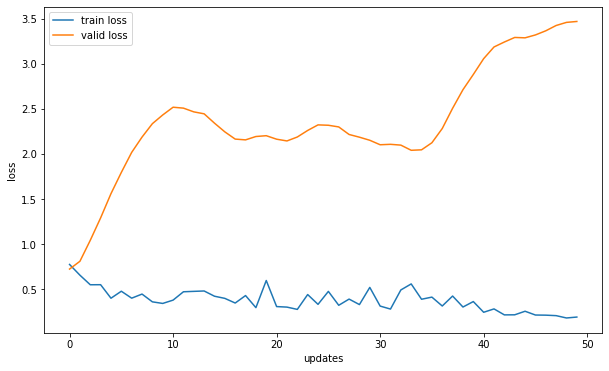

In [37]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 6))
ax  = fig.add_subplot(1, 1, 1)
ax.plot(train_losses, label = 'train loss')
ax.plot(valid_losses, label = 'valid loss')
plt.legend()
ax.set_xlabel('updates')
ax.set_ylabel('loss')